<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/Notebooks/IT24102772_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 6835, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 6835 (delta 24), reused 10 (delta 0), pack-reused 6760 (from 3)
Receiving objects: 100% (6835/6835), 144.20 MiB | 29.96 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Updating files: 100% (7035/7035), done.
Training data shape: (5712, 224, 224, 3)
Testing data shape: (1311, 224, 224, 3)
Pixel value range: min = 0.0 , max = 1.0


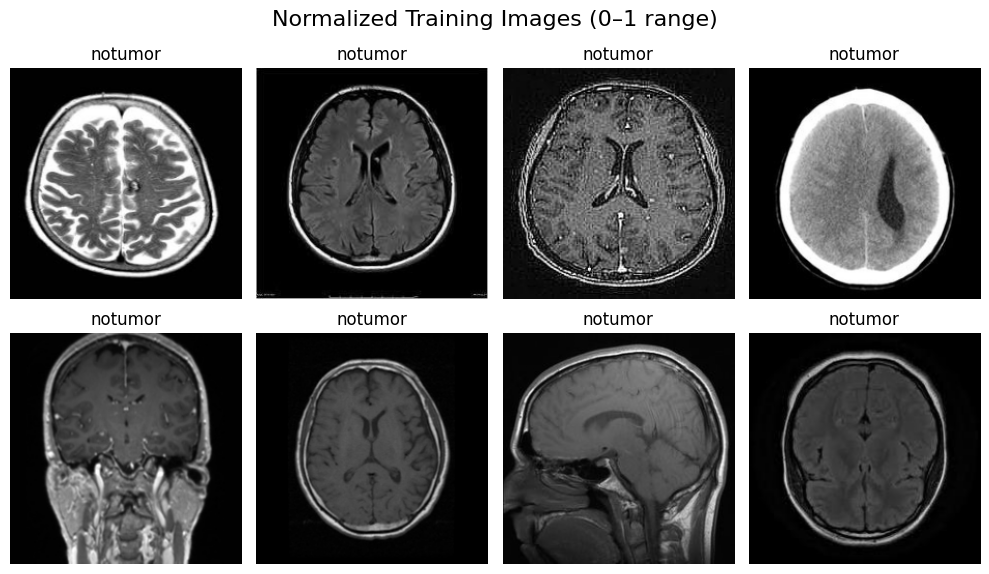

✅ Normalized dataset saved as .npy files


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Clone the GitHub repository
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git



# --------------------------
# Step 1: Dataset Path
# --------------------------
train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"

IMG_SIZE = (224, 224)

# --------------------------
# Step 2: Function to Load & Normalize Images
# --------------------------
def load_and_normalize_images(directory):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)

                try:
                    # Load image
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, IMG_SIZE)   # Resize to (224x224)

                    # Normalization: scale 0–255 → 0–1
                    img = img.astype("float32") / 255.0

                    images.append(img)
                    labels.append(class_name)
                except:
                    print("Corrupted image skipped:", img_path)

    return np.array(images), np.array(labels)

# --------------------------
# Step 3: Apply to Training & Test Data
# --------------------------
X_train, y_train = load_and_normalize_images(train_dir)
X_test, y_test = load_and_normalize_images(test_dir)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Pixel value range: min =", X_train.min(), ", max =", X_train.max())

# --------------------------
# Step 4: Visualization
# --------------------------
plt.figure(figsize=(10,6))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])  # Show class label
    plt.axis("off")

plt.suptitle("Normalized Training Images (0–1 range)", fontsize=16)
plt.tight_layout()
plt.show()

# --------------------------
# Step 5: Save Normalized Data (optional)
# --------------------------
np.save("X_train_normalized.npy", X_train)
np.save("y_train_labels.npy", y_train)
np.save("X_test_normalized.npy", X_test)
np.save("y_test_labels.npy", y_test)

print("✅ Normalized dataset saved as .npy files")
